# ANALYZING CRIMES IN LOS ANGELES

![alt text](/Users/hangtran/Desktop/Analyzing_LACrimes/Analyzing_LACrimes/la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

### The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

Crimes.csv
| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |


## Using this dataset, they are asking questions about 
1. Which hour has the highest frequency of crimes?
2. Which area has the largest frequency of night crimes? (crimes committed between 10pm and 3:59am)
3. Identify the number of crimes committed against victims of different age groups
4. Build a ML model to predict the area with the highest frequency of night crimes?

In [39]:
# Import libraries and dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer 

crimes = pd.read_csv("/Users/hangtran/Desktop/Analyzing_LACrimes/Analyzing_LACrimes/crimes.csv", dtype = {"TIME OCC":str})
crimes.head(5)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


### 1. What hour has the highest frequency of crimes?

Text(0, 0.5, 'Number of Crimes')

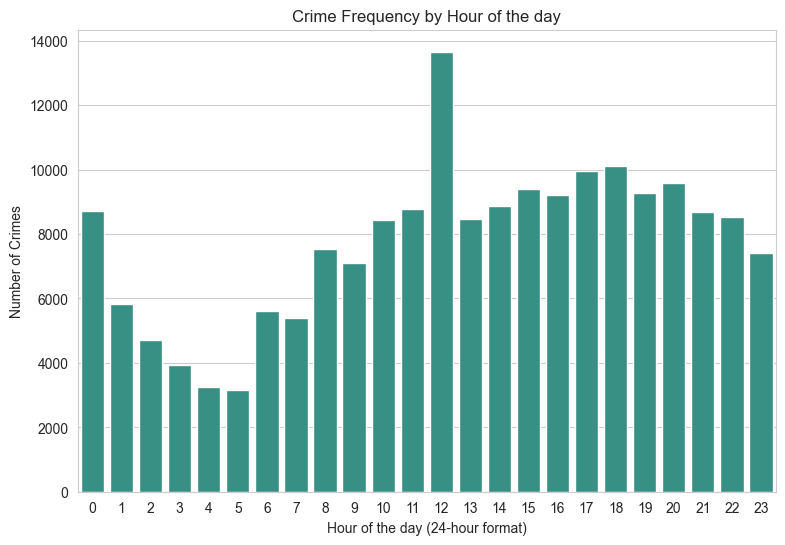

In [21]:
# Extract the hour
crimes['HOUR_OCC'] = crimes['TIME OCC'].str[:2].astype(int)

# Plotting the frequencies
plt.figure(figsize=(9,6))
sns.set_style('whitegrid')
sns.countplot(data = crimes, x = 'HOUR_OCC', color="#2a9d8f", linewidth=1, edgecolor= 'white')
plt.title("Crime Frequency by Hour of the day")
plt.xlabel("Hour of the day (24-hour format)")
plt.ylabel("Number of Crimes")

### 2. Which area has the largest frequency of night crimes? (crimes committed between 10pm and 3:59am)

In [31]:
# Subsetting for night hour
crimes_night = crimes[crimes['HOUR_OCC'].isin([22,23,0,1,2,3])]

# Counting crimes by area
peak_night_crime_location = crimes_night.groupby("AREA NAME").size().sort_values(ascending=False).astype(str).index[0]
print(f"{peak_night_crime_location} has the largest frequency of night crimes in LA")


Central has the largest frequency of night crimes in LA


### 3. Identify the number of crimes committed against victims of different age groups

In [33]:
# Crimes against victims of different age groups
list_of_age = [0, 17, 25, 34, 44, 54, 64, np.inf]
labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]
crimes["Age Bracket"] = pd.cut(crimes["Vict Age"], bins = list_of_age, labels = labels, right = True)
victim_ages = crimes["Age Bracket"].value_counts().sort_values(ascending=False)
print(victim_ages)

Age Bracket
26-34    47470
35-44    42157
45-54    28353
18-25    28291
55-64    20169
65+      14747
0-17      4528
Name: count, dtype: int64


### 4. Build a ML model to predict the area with the high frequency of night crimes?

#### 4.1 EDA

In [44]:
# Check for missing value
print(crimes_night.isna().sum().sort_values())

DR_NO               0
Date Rptd           0
DATE OCC            0
TIME OCC            0
AREA NAME           0
Crm Cd Desc         0
Vict Age            0
Status Desc         0
LOCATION            0
HOUR_OCC            0
Vict Descent        4
Vict Sex            5
Weapon Desc     21975
dtype: int64


In [ ]:
# Check categorical data type
print(crimes_night.astype(str).dtypes)

DATE OCC        object
TIME OCC        object
AREA NAME       object
Crm Cd Desc     object
Vict Age        object
Vict Sex        object
Vict Descent    object
Weapon Desc     object
Status Desc     object
HOUR_OCC        object
dtype: object


In [49]:
# Fill missing values with SimpleImputer for categorical
imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
col_imputed = ["Vict Descent", "Vict Sex", "Weapon Desc"]
crimes_night[col_imputed] = imputer.fit_transform(crimes_night[col_imputed])


In [59]:
# Drop irrevalent columns
col_drop = ["DR_NO", "Date Rptd", "LOCATION", "HOUR_OCC"]
crimes_night = crimes_night.drop(columns=col_drop, errors='ignore')

In [60]:
# Choose our target and features
X = crimes_night.drop(columns=["AREA NAME"], errors="ignore")
y = crimes_night['AREA NAME']

In [ ]:
# One hot encoding for categorical columns

